In [ ]:
# DESCRIPTION

# One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
# There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart.
# The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate 
# machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic
# conditions including CPI, Unemployment Index, etc.
# Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, 
# the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. 
# The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 
# Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks 
# in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different 
# regions are available.

# Dataset Description

# This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. 
# Within this file you will find the following fields:

# Store - the store number
# Date - the week of sales
# Weekly_Sales -  sales for the given store
# Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
# Temperature - Temperature on the day of sale
# Fuel_Price - Cost of fuel in the region
# CPI – Prevailing consumer price index
# Unemployment - Prevailing unemployment rate

# Holiday Events

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# Analysis Tasks

# Basic Statistics tasks

# Which store has maximum sales
# Which store has maximum standard deviation i.e., the sales vary a lot. 
# Also, find out the coefficient of mean to standard deviation
# Which store/s has good quarterly growth rate in Q3’2012
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in 
# non-holiday season for all stores together
# Provide a monthly and semester view of sales in units and give insights

# Statistical Model

# For Store 1 – Build  prediction models to forecast demand
# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010
# (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
# Change dates into days by creating new variable.
# Select the model which gives best accuracy.

In [27]:
import pandas as pd
import numpy as np

### Import the CSV file of Retail_Walmart
retail= pd.read_csv(r"C:\Users\Akash_Surface\Desktop\Simplilearn\Data Science with Python\Walmart_Store_sales.csv")
print(retail.head())
print(retail.tail())

### Q1. TO FIND THE STORE WITH MAXIMUM SALES

## Create a DataFrame of Sum of Weekly Sales grouped by Store.
df1= pd.DataFrame({"Sum_sales":retail.groupby(retail.Store).sum()["Weekly_Sales"]})
print(df1.head())

##Find the maximum sales.
max_sales=np.max(df1.Sum_sales)
target= any(df1.Sum_sales==max_sales)

##Find the store with maximum sales.
store_max_sales= df1[df1.Sum_sales==max_sales]

print(max_sales)
print(store_max_sales)
##Answer: Store 20 has the maximum sales

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53   

In [28]:
### Q2. TO FIND THE STORE WITH MAXIMUM STANDARD DEVIATION

## Create a DataFrame of standard deviation of Weekly_sales by Store
aggg=(np.std)
df2= pd.DataFrame({"Std_sales":retail.groupby(retail.Store)["Weekly_Sales"].agg(aggg)})
print(df2)

##Find the Maximum Deviation
max_dev= np.max(df2.Std_sales)
store_max_dev= df2[df2.Std_sales==max_dev]

print(store_max_dev)

##Answer: Store 14 has the maximum deviation

### Q2.2 TO FIND THE COEFFICIENT OF MEAN TO MAXIMUM STANDARD DEVIATION

agg2=(np.mean)
df3= pd.DataFrame({"Mean_sales":retail.groupby(retail.Store)["Weekly_Sales"].agg(agg2)})
# print(df3)

df4=pd.merge(left=df3,right=df2,how='outer', left_index=True, right_index=True)
df4["Coefficiant"]= df4.Std_sales/df4.Mean_sales
print(df4)


Std_sales
Store               
1      155980.767761
2      237683.694682
3       46319.631557
4      266201.442297
5       37737.965745
6      212525.855862
7      112585.469220
8      106280.829881
9       69028.666585
10     302262.062504
11     165833.887863
12     139166.871880
13     265506.995776
14     317569.949476
15     120538.652043
16      85769.680133
17     112162.936087
18     176641.510839
19     191722.638730
20     275900.562742
21     128752.812853
22     161251.350631
23     249788.038068
24     167745.677567
25     112976.788600
26     110431.288141
27     239930.135688
28     181758.967539
29      99120.136596
30      22809.665590
31     125855.942933
32     138017.252087
33      24132.927322
34     104630.164676
35     211243.457791
36      60725.173579
37      21837.461190
38      42768.169450
39     217466.454833
40     119002.112858
41     187907.162766
42      50262.925530
43      40598.413260
44      24762.832015
45     130168.526635
           Std_sales
Sto

In [29]:
### Q3. Which store/s has good quarterly growth rate in Q3’2012

import datetime as dt
def convert(x):
    return dt.datetime.strptime(x, "%d-%m-%Y")
    

retail["Date"]= retail.Date.apply(convert)
print(retail.head())

def find_q3(x):
    if( x.month>8 and x.year==2012):
        return True
    else:
        return False

def find_q2(x):
    if( x.month>4 and x.month<8 and x.year==2012):
        return True
    else:
        return False
    

q3= retail[retail.Date.apply(find_q3)].groupby(["Store"]).agg({"Weekly_Sales":'mean'})
q2= retail[retail.Date.apply(find_q2)].groupby(["Store"]).agg({"Weekly_Sales":'mean'})

quaterly_growth= (q3-q2)
print(quaterly_growth[quaterly_growth.Weekly_Sales==quaterly_growth.Weekly_Sales.max()])

##Answer: Store 17 has the maximum 3rd quaterly growth in 2012

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
       Weekly_Sales
Store              
17      36587.11375


In [30]:
# Q4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

mean_all= retail[retail.Holiday_Flag==0].agg({"Weekly_Sales":'mean'})
print(mean_all)

def find_sale(x):
    if(x==1 ):
        
        return True
    else:
        return False

def abc(x):
    if(x>mean_all[0]):
        return True
    else:
        return False

holiday=retail[retail.Holiday_Flag==1].loc[retail.Weekly_Sales.apply(abc)]
print(holiday)
holiday.set_index("Store", inplace=True)
print(holiday[["Date"]])

### The above rows and columns give sales more than non- holiday sales.

Weekly_Sales    1.041256e+06
dtype: float64
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1         1 2010-02-12    1641957.44             1        38.51       2.548   
31        1 2010-09-10    1507460.69             1        78.69       2.565   
42        1 2010-11-26    1955624.11             1        64.52       2.735   
47        1 2010-12-31    1367320.01             1        48.43       2.943   
53        1 2011-02-11    1649614.93             1        36.39       3.022   
...     ...        ...           ...           ...          ...         ...   
5819     41 2011-12-30    1264014.16             1        34.12       3.119   
5825     41 2012-02-10    1238844.56             1        22.00       3.103   
5855     41 2012-09-07    1392143.82             1        67.41       3.596   
6334     45 2010-11-26    1182500.16             1        46.15       3.039   
6386     45 2011-11-25    1170672.94             1        48.71       3.492   

       

In [31]:
## Q5. Convert Dates into number of days Provide a monthly and semester view of sales in units and give insights

retail["Days"]= retail.Date.apply(lambda x : x.timetuple().tm_yday)
retail["Months"]= retail.Date.apply(lambda x : x.month)
retail["Years"]= retail.Date.apply(lambda x : x.year)

yearly_sales=retail.groupby('Years').agg({'Weekly_Sales':'sum'})
monthly_sales=retail.groupby('Months').agg({'Weekly_Sales':'sum'})
print(yearly_sales, monthly_sales)

Weekly_Sales
Years              
2010   2.288886e+09
2011   2.448200e+09
2012   2.000133e+09         Weekly_Sales
Months              
1       3.325984e+08
2       5.687279e+08
3       5.927859e+08
4       6.468598e+08
5       5.571256e+08
6       6.226299e+08
7       6.500010e+08
8       6.130902e+08
9       5.787612e+08
10      5.847848e+08
11      4.130157e+08
12      5.768386e+08


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90             0        42.31       2.572   
1        1 2010-02-12    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-03-05    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-10-05    1670785.97             0        68.55       3.617   
140      1 2012-10-12    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment  Days  Months  Years  
0    211.096358

Text(0, 0.5, 'Monthly_Sales')

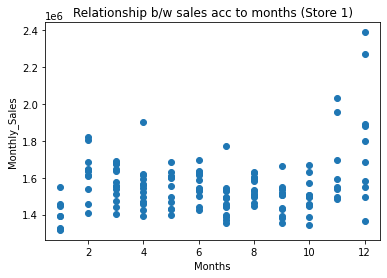

In [40]:
## Q6. For Store 1 – Build  prediction models to forecast demand using Logistic Regression
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
 

store1=retail[retail.Store==1]
print(store1)

plt.scatter(store1.Months, store1.Weekly_Sales)
plt.title("Relationship b/w sales acc to months (Store 1)")
plt.xlabel("Months")
plt.ylabel("Monthly_Sales")



In [72]:
## Q7. Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

x = retail[['Store','Fuel_Price', 'CPI','Unemployment','Weekly_Sales','Days']]
y = retail['Date']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

logistic_regression= LogisticRegression()
logistic_regression=logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred,'\n')

print(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

['2010-12-24T00:00:00.000000000' '2010-12-24T00:00:00.000000000'
 '2010-12-24T00:00:00.000000000' ... '2010-12-24T00:00:00.000000000'
 '2010-12-24T00:00:00.000000000' '2010-12-24T00:00:00.000000000'] 

      Store  Fuel_Price         CPI  Unemployment  Weekly_Sales  Days
2704     19       3.819  138.173581         8.193    1342123.78   216
2346     17       3.407  128.512193         6.866     778436.81    77
5200     37       2.989  211.333375         8.395     583835.18    35
3483     25       3.237  205.389495         7.343     600448.69    28
349       3       3.807  218.851237         7.574     391860.04   112
...     ...         ...         ...           ...           ...   ...
4457     32       2.691  189.774698         9.017    1109574.11   204
4138     29       3.884  138.377194         9.419     545844.91   244
5972     42       3.963  130.741379         7.545     659816.15    69
3050     22       3.177  136.665265         8.572     774262.28   365
5448     39       2.854  209